# Ski Resorts Exploratory Data Analysis

## Overview - Analyze the datasets which contain the statistical data of the ski resorts across the world, identify the key factors of success and be profitable in a ski resort management. Provide the visualized data information and provide insights for our hypothetical to run the business effectively.

**Import Libraries and Datasets**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
# Initialize the default style for the matplotlib
plt.style.use('ggplot')
# configure the default figure size for all plots
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = (12, 12)

In [4]:
# import datasets from the csv
resorts_df = pd.read_csv(r'./datasets/resorts.csv', encoding='cp1252')
snow_df = pd.read_csv(r'./datasets/snow.csv', encoding='cp1252')

**1. Previewing the head of each dataframe**

In [5]:
# change limits of rows and columns display

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [6]:
# resorts dataset
resorts_df.head()

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
0,1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,29,10,4,43,6,325,15,6,0,21,22921,Yes,Yes,Yes,No
1,2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,18,12,4,34,2,100,18,6,0,24,14225,Yes,Yes,Yes,No
2,3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,13,12,1,26,9,123,4,4,3,11,16240,Yes,No,No,No
3,4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,20,50,50,120,7,0,2,5,1,8,9200,Yes,Yes,Yes,No
4,5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,33,7,4,44,6,150,14,3,1,18,21060,Yes,Yes,Yes,No


In [7]:
snow_df.head()

,Month,Latitude,Longitude,Snow
0,2022-12-01,63.125,68.875,95.28
1,2022-12-01,63.125,69.125,100.00
2,2022-12-01,63.125,69.375,100.00
3,2022-12-01,63.125,69.625,100.00
4,2022-12-01,63.125,69.875,100.00


**2. Data Preparation**

In [8]:
# check total rows and columns in the dataset
resorts_df.shape

(499, 25)

In [9]:
# check total rows and columns in the dataset
snow_df.shape

(820522, 4)

**2.1. Datatype Verification**

In [10]:
# datatype verification
resorts_df.dtypes

resorts_df['Child friendly'].unique()


# resorts_df


array(['Yes', 'No'], dtype=object)

In [11]:
resorts_df['Snowparks'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
resorts_df['Nightskiing'].unique()

array(['Yes', 'No'], dtype=object)

In [13]:
resorts_df['Summer skiing'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# Only Yes, No are contained in the resorts_df
# Child friendly, Snowparks, Nightskiing, Summer skiing columns can be changed to boolean type
resorts_df['Child friendly'] = resorts_df['Child friendly'].map({'Yes': True, 'No': False})
resorts_df['Snowparks'] = resorts_df['Snowparks'].map({'Yes': True, 'No': False})
resorts_df['Nightskiing'] = resorts_df['Nightskiing'].map({'Yes': True, 'No': False})
resorts_df['Summer skiing'] = resorts_df['Summer skiing'].map({'Yes': True, 'No': False})

resorts_df[['Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']] = resorts_df[['Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']].astype('bool')

resorts_df[['Child friendly', 'Snowparks', 'Nightskiing', 'Summer skiing']].head()


,Child friendly,Snowparks,Nightskiing,Summer skiing
0,True,True,True,False
1,True,True,True,False
2,True,False,False,False
3,True,True,True,False
4,True,True,True,False


In [15]:
# datatype verification
snow_df.dtypes

Month         object
Latitude     float64
Longitude    float64
Snow         float64
dtype: object

**2.2 Handle Duplication and Nulls**

In [16]:
# check null values
resorts_df.isna().sum()

ID                     0
Resort                 0
Latitude               0
Longitude              0
Country                0
Continent              0
Price                  0
Season                 0
Highest point          0
Lowest point           0
Beginner slopes        0
Intermediate slopes    0
Difficult slopes       0
Total slopes           0
Longest run            0
Snow cannons           0
Surface lifts          0
Chair lifts            0
Gondola lifts          0
Total lifts            0
Lift capacity          0
Child friendly         0
Snowparks              0
Nightskiing            0
Summer skiing          0
dtype: int64

In [17]:
# check null values
snow_df.isna().sum()

Month        0
Latitude     0
Longitude    0
Snow         0
dtype: int64

In [18]:
# check duplicate values
resorts_df[resorts_df.duplicated()]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing


In [19]:
# check duplicate values
snow_df[snow_df.duplicated()]

# no nulls and duplicate values found, move on to the next step

,Month,Latitude,Longitude,Snow


**2.3. Data Transform**

In [20]:
import sys
import os

sys.path.append(os.path.abspath('./utils'))

import utils
# module updates handle
import importlib

importlib.reload(utils)

# remove invalid characters from the string
# define a function to transform the invalid characters
pattern = r'[^a-zA-Z0-9\s\w-]'

# check number of invalid characters inside the columns
invalid_mask = resorts_df['Resort'].str.contains(pattern, regex=True)

invalid_count = resorts_df[invalid_mask]['Resort'].count()
invalid_count

211

In [21]:
# hyphens are allowed in the column data
resorts_df = utils.remove_invalid_characters(resorts_df, columns=['Resort'])
resorts_df.head()

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
0,1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,29,10,4,43,6,325,15,6,0,21,22921,True,True,True,False
1,2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,18,12,4,34,2,100,18,6,0,24,14225,True,True,True,False
2,3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,13,12,1,26,9,123,4,4,3,11,16240,True,False,False,False
3,4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,20,50,50,120,7,0,2,5,1,8,9200,True,True,True,False
4,5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,33,7,4,44,6,150,14,3,1,18,21060,True,True,True,False


In [22]:
# Check any invalid characters in the column
resorts_df['Country'].unique()

array(['Norway', 'Austria', 'Canada', 'New Zealand', 'Chile', 'Germany',
       'Switzerland', 'Italy', 'France', 'United Kingdom',
       'United States', 'Andorra', 'Australia', 'Argentina', 'Finland',
       'Japan', 'Slovenia', 'Bulgaria', 'Spain', 'Sweden', 'Lebanon',
       'Russia', 'Ukraine', 'Georgia', 'Serbia', 'Turkey', 'Slovakia',
       'Poland', 'Bosnia and Herzegovina', 'Czech Republic', 'Iran',
       'South Korea', 'Romania', 'Greece', 'Liechtenstein', 'Lithuania',
       'Kazakhstan', 'China'], dtype=object)

In [23]:
# Check any invalid characters in the column
resorts_df['Continent'].unique()

array(['Europe', 'North America', 'Oceania', 'South America', 'Asia'],
      dtype=object)

In [24]:
# The original dataset described the information in a human readable representation, one of the example is the Season column, which represent the period of time by using english month to english month.

# We can break this into two separate columns like "Season From" and "Season To" to make it easier for the periodic analysis

# Check any invalid characters in the column
resorts_df['Season'].unique()

array(['November - May', 'November - April', 'December - April',
       'June - September', 'June - October', 'Year-round',
       'October - June', 'September - June', 'December - March',
       'October - May',
       'December - April, June - August, October - November',
       'July - September', 'November - May, June - August',
       'May - September', 'December - May', 'July', 'September - May',
       'October - April', 'April', 'Unknown', 'July - April',
       'May - October', 'November - June', 'September - April', 'May',
       'June - May', 'November - March', 'March', 'December',
       'October - November, December - May, June - October',
       'July - October'], dtype=object)

In [25]:
# unknown season found - for now, we can just ignore this
resorts_df.query('Season == "Unknown"').head()

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
123,124,Courmayeur Checrouit - Val Veny,45.787425,6.973062,Italy,Europe,46,Unknown,2755,1205,16,21,4,41,0,280,4,8,6,18,24497,True,True,False,False
181,182,Mondole Ski-Artesina-Frabosa Soprana-Prato Nevoso,44.249446,7.775081,Italy,Europe,33,Unknown,807,803,42,51,11,104,0,0,19,14,0,33,26068,True,True,True,False
233,234,Mzaar Kfardebian,33.972129,35.839567,Lebanon,Asia,51,Unknown,2465,1850,46,30,4,80,0,0,0,0,0,0,0,True,False,False,False
241,242,Jay Peak,47.631371,-120.829534,United States,North America,70,Unknown,1175,563,15,31,30,76,0,0,2,6,1,9,11675,True,False,False,False
299,300,Oppdal,62.535178,9.623304,Norway,Europe,44,Unknown,1300,585,40,7,9,56,0,0,1,0,0,1,0,True,False,False,False


In [26]:

# separating Season to "Season From" and "Season To"
# symbols in the column are ',' and '-'

tmp_df = resorts_df.copy()

# Spliting multiple Seaons Resort for future analysis
tmp_df['Split_Season'] = tmp_df['Season'].str.split(r'[,-]')
tmp_df['Split_Season']

# check if the seasons in the list are paired
tmp_df['Split_Season'].apply(len).unique()

array([2, 6, 4, 1], dtype=int64)

In [27]:
# filtering "Season From" by modding the value index, if the index remains 1 then the index should be like [0, 2, 4]
def filter_from(lst):
    if len(lst) == 1:
        return [lst[0]]
    return [value for index, value in enumerate(lst) if index % 2 == 1]

# filtering "Season To" by modding the value index, if the index remains 0 then the index should be like [1, 3, 5]
def filter_to(lst):
    if len(lst) == 1:
        return []
    return [value for index, value in enumerate(lst) if index % 2 == 0]

tmp_df['Season From'] = tmp_df['Split_Season'].apply(filter_from)
tmp_df['Season To'] = tmp_df['Split_Season'].apply(filter_to)

tmp_df = tmp_df.drop(['Season', 'Split_Season'], axis=1)
resorts_df = tmp_df.copy()


In [28]:
# standardize the decimal places of the latitude and longitude to comply with the snow_df
resorts_df[['Latitude', 'Longitude']] = resorts_df[['Latitude', 'Longitude']].round(3)
resorts_df.head()

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing,Season From,Season To
0,1,Hemsedal,60.928,8.383,Norway,Europe,46,1450,620,29,10,4,43,6,325,15,6,0,21,22921,True,True,True,False,[ May],[November ]
1,2,Geilosiden Geilo,60.535,8.206,Norway,Europe,44,1178,800,18,12,4,34,2,100,18,6,0,24,14225,True,True,True,False,[ April],[November ]
2,3,Golm,47.058,9.828,Austria,Europe,48,2110,650,13,12,1,26,9,123,4,4,3,11,16240,True,False,False,False,[ April],[December ]
3,4,Red Mountain Resort-Rossland,49.106,-117.846,Canada,North America,60,2075,1185,20,50,50,120,7,0,2,5,1,8,9200,True,True,True,False,[ April],[December ]
4,5,Hafjell,61.230,10.529,Norway,Europe,45,1030,195,33,7,4,44,6,150,14,3,1,18,21060,True,True,True,False,[ April],[November ]


**3. Understand Relationship**

In [29]:
# Review the columns inside the resorts dataframe
resorts_df.columns

Index(['ID', 'Resort', 'Latitude', 'Longitude', 'Country', 'Continent',
       'Price', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity', 'Child friendly',
       'Snowparks', 'Nightskiing', 'Summer skiing', 'Season From',
       'Season To'],
      dtype='object')

In [30]:
# Review the columns inside the snow dataframe
snow_df.columns

Index(['Month', 'Latitude', 'Longitude', 'Snow'], dtype='object')

In [31]:
snow_df

,Month,Latitude,Longitude,Snow
0,2022-12-01,63.125,68.875,95.28
1,2022-12-01,63.125,69.125,100.00
2,2022-12-01,63.125,69.375,100.00
3,2022-12-01,63.125,69.625,100.00
4,2022-12-01,63.125,69.875,100.00
...,...,...,...,...
820517,2022-01-01,-53.375,-68.375,1.57
820518,2022-01-01,-54.375,-36.625,33.86
820519,2022-01-01,-54.625,-69.375,3.94
820520,2022-01-01,-55.375,-68.875,1.97


In [32]:
resorts_df.loc[(resorts_df['Latitude'] >= 63) & (resorts_df['Longitude'] >=68)]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing,Season From,Season To


In [33]:
# Latitude and longitude are the two significant columns that are showing relationship 

# Test case - find related resort using latitude and longitude
merge_df = pd.merge(
    resorts_df,
    snow_df,
    on=['Latitude', 'Longitude'],
    suffixes=('_df1', '_df2')
)

In [34]:
# merged dataframe is empty, no relationship between two datasets
merge_df

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing,Season From,Season To,Month,Snow


In [35]:
resorts_df[['Price', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity']].describe()

,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,48.721443,2160.589178,1200.631263,31.819639,37.921844,16.164329,85.905812,3.545090,179.136273,11.282565,9.721443,3.258517,24.262525,31650.961924
std,21.718733,774.339805,596.142294,47.401764,44.358524,20.115855,100.874157,3.947887,372.321111,13.365360,11.461502,5.867967,27.672736,40781.986019
min,0.000000,163.000000,36.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,1594.000000,800.000000,10.000000,12.000000,3.000000,30.000000,0.000000,0.000000,3.000000,3.000000,0.000000,10.000000,11645.000000
50%,45.000000,2175.000000,1121.000000,18.000000,25.000000,9.000000,55.000000,3.000000,15.000000,7.000000,6.000000,1.000000,15.000000,18510.000000
75%,54.000000,2700.000000,1500.000000,30.000000,45.000000,21.000000,100.000000,6.000000,180.000000,14.000000,11.500000,4.000000,26.000000,32829.000000
max,141.000000,3914.000000,3286.000000,312.000000,239.000000,126.000000,600.000000,16.000000,2383.000000,89.000000,74.000000,40.000000,174.000000,252280.000000


In [36]:
resorts_df[[ 'Price', 'Highest point', 'Lowest point', 'Beginner slopes',
       'Intermediate slopes', 'Difficult slopes', 'Total slopes',
       'Longest run', 'Snow cannons', 'Surface lifts', 'Chair lifts',
       'Gondola lifts', 'Total lifts', 'Lift capacity']].corr(numeric_only=True)

,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity
Price,1.000000,0.380610,0.368589,0.118946,0.312376,0.572100,0.307344,0.262453,0.076502,-0.025047,0.234412,0.122865,0.111045,0.152454
Highest point,0.380610,1.000000,0.782016,0.295720,0.416730,0.487343,0.419399,0.279931,0.176750,0.161703,0.299979,0.300400,0.266044,0.278586
Lowest point,0.368589,0.782016,1.000000,-0.012059,0.071499,0.304221,0.086441,-0.009405,-0.105067,-0.118392,0.026891,-0.101544,-0.067575,-0.055174
Beginner slopes,0.118946,0.295720,-0.012059,1.000000,0.774768,0.537219,0.917737,0.064736,0.776379,0.832508,0.859739,0.780700,0.923717,0.930134
Intermediate slopes,0.312376,0.416730,0.071499,0.774768,1.000000,0.713694,0.946134,0.213462,0.645121,0.713464,0.779930,0.736671,0.823830,0.822286
Difficult slopes,0.572100,0.487343,0.304221,0.537219,0.713694,1.000000,0.765700,0.208434,0.336805,0.402179,0.569858,0.448949,0.525467,0.531870
Total slopes,0.307344,0.419399,0.086441,0.917737,0.946134,0.765700,1.000000,0.165853,0.715678,0.785144,0.860606,0.780330,0.901122,0.904735
Longest run,0.262453,0.279931,-0.009405,0.064736,0.213462,0.208434,0.165853,1.000000,0.128744,0.076156,0.068464,0.203237,0.108234,0.111323
Snow cannons,0.076502,0.176750,-0.105067,0.776379,0.645121,0.336805,0.715678,0.128744,1.000000,0.679524,0.704607,0.780760,0.785589,0.816128
Surface lifts,-0.025047,0.161703,-0.118392,0.832508,0.713464,0.402179,0.785144,0.076156,0.679524,1.000000,0.738961,0.642538,0.925292,0.860547


**3.1. Relationship Sampling - Total amount of slopes compare with different levels of slope by Continent to see their relationship**
1. Beginner Slopes vs Total Slopes
2. Intermediate Slopes vs Total Slopes
3. Difficult Slopes vs Total Slopes

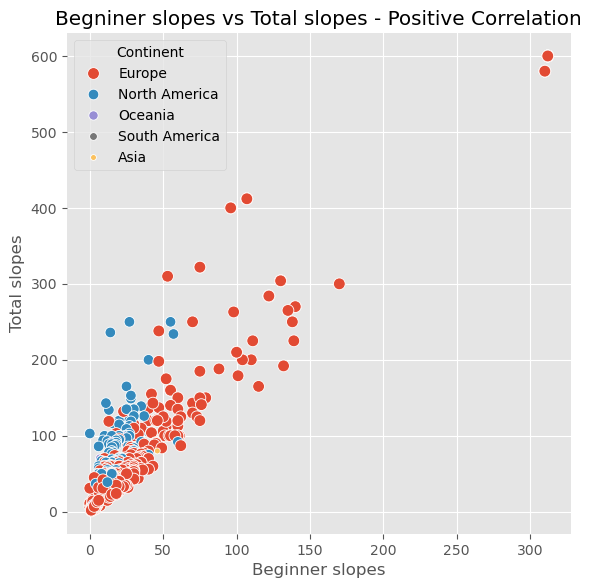

In [37]:
# Example - Use scatter_plt to check the relationship between Beginner slopes and total slopes
bvt_splt = utils.scatterplot_generator(resorts_df, "Beginner slopes", "Total slopes","Beginner slopes vs Total slopes - Positive Correlation", "Beginner slopes", "Total slopes", hue="Continent", size="Continent")

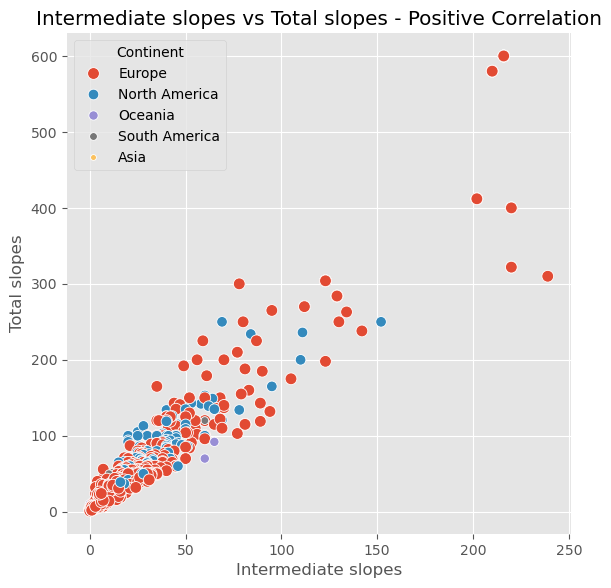

In [38]:
# Example - Use scatter_plt to check the relationship between Intermediate slopes and total slopes
bvt_splt = utils.scatterplot_generator(resorts_df, "Intermediate slopes", "Total slopes","Intermediate slopes vs Total slopes - Positive Correlation", "Intermediate slopes", "Total slopes", hue="Continent", size="Continent")

**Using the 'Continent' column as the parameters of hue and size, we can see Europe and North America dominate every difficulty of slopes in the total number of slopes, which significantly represents these two regions having more slope selection in different difficulties.**

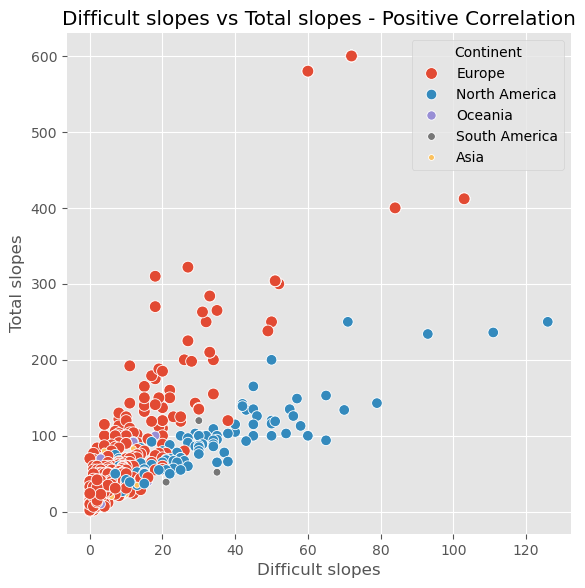

In [39]:
# Example - Use scatter_plt to check the relationship between Intermediate slopes and total slopes
bvt_splt = utils.scatterplot_generator(resorts_df, "Difficult slopes", "Total slopes","Difficult slopes vs Total slopes - Positive Correlation", "Difficult slopes", "Total slopes", hue="Continent", size="Continent")

**3.2. Relationship Sampling - Total distance of the slope run compare with the Lift capcity**